In [74]:
# Importing all packages needed for the project
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from pyjstat import pyjstat
import matplotlib.ticker as ticker
from matplotlib.image import imread

In [75]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13153/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "InnKvartering1",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Senger"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [76]:
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [77]:
# Fixing the dataset so M is replaced with -
df['year'] =df['måned'].str.replace('M', '-')

# Taking out the nordland and troms finnmark column and storing both in a new dataset each
nordland_df = df[df['region'] == 'Nordland - Nordlánnda']
troms_finnmark_df = df[df['region'] == 'Troms og Finnmark - Romsa ja Finnmárku']

# Putting the two datasets together
nord_norge_df = pd.concat([nordland_df, troms_finnmark_df])

# Making a copy of the dataset
nord_norge_df= nord_norge_df.copy()

nord_norge_df['year'] = pd.to_datetime(nord_norge_df['year'], format='%Y-%m')

# Group the dataframe by year and summarize the monthly data
nord_norge_df = nord_norge_df.groupby(nord_norge_df['year'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
nord_norge_df=nord_norge_df.reset_index()

In [78]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13156/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "KapasitetSeng"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

df1, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [79]:
# Fixing the dataset so M is replaced with -
df1['year'] =df1['måned'].str.replace('M', '-')

# Taking out the nordland and troms finnmark column and storing both in a new dataset each
nordland_df1 = df1[df1['region'] == 'Nordland - Nordlánnda']
troms_finnmark_df1 = df1[df1['region'] == 'Troms og Finnmark - Romsa ja Finnmárku']

# Putting the two datasets together
nord_norge_df1 = pd.concat([nordland_df1, troms_finnmark_df1])

# Making a copy of the dataset
nord_norge_df1= nord_norge_df1.copy()

nord_norge_df1['year'] = pd.to_datetime(nord_norge_df1['year'], format='%Y-%m')

# Group the dataframe by year and summarize the yearly data and find the mean of the yearly data
nord_norge_df1 = nord_norge_df1.groupby(nord_norge_df1['year'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
nord_norge_df1=nord_norge_df1.reset_index()

In [80]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13152/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54"
        ]
      }
    },
    {
      "code": "InnKvartering1",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    },
    {
      "code": "Landkoder2",
      "selection": {
        "filter": "item",
        "values": [
          "ccc",
          "000"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

df_1, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [81]:
# Fixing the dataset so M is replaced with -
df_1['måned'] =df_1['måned'].str.replace('M', '-')

# Taking out the svalbard column and storing it in a new dataset
norge = df_1[df_1['bustadland'] == 'Norge']

# Making a copy of the dataset
norge= norge.copy()

# Taking out the svalbard column and storing it in a new dataset
utlandet = df_1[df_1['bustadland'] == 'Utlandet i alt']

# Making a copy of the dataset
utlandet= utlandet.copy()

# Converting the date to datetime
norge['year'] = pd.to_datetime(norge['måned'], format='%Y-%m')

# Group the dataframe by year and find the mean of the yearly data
norge = norge.groupby(norge['year'].dt.year).agg({
    'value': 'sum'
})

# Fixing so the first column is not the index
norge=norge.reset_index()

# Converting the date to datetime
utlandet['year'] = pd.to_datetime(utlandet['måned'], format='%Y-%m')

# Group the dataframe by year and find the mean of the yearly data
utlandet = utlandet.groupby(utlandet['year'].dt.year).agg({
    'value': 'sum'
})

# Fixing so the first column is not the index
utlandet=utlandet.reset_index()

# Putting the two datasets together
total = pd.concat([utlandet, norge])

# aggregate the data by year and sum the values
total = total.groupby('year').agg({'value': 'sum'})

# Fixing so the first column is not the index
total=total.reset_index()

In [82]:
# Setting the style for the plots
plt.style.use('seaborn-v0_8-dark')

# Plotting the data
fig, ax = plt.subplots( figsize=(8.5,6))

# Plotting first bar
ax.bar(nord_norge_df['year'].astype('string'),nord_norge_df['value'], label='Nord-Norge kapasitet', color='#1f77b4')

# Set the title
ax.set_title('Figur 1. Antall hotellsenger og hotellkapasitet i Nord-Norge. 2016-2022', fontsize=12, fontweight='bold')

# Fixing the grid
ax.grid(axis='y')

# Caption
ax.text(5, -1000, 'Kilde: Statistics Norway.', fontsize=10)
ax.text(5.5, 10900, 'Hotellkapasitets %', fontsize=10)
ax.text(-1, 10900, 'Antall ledige senger', fontsize=10)

# Fixing max y value
ax.set_ylim(0, 10630)

# Making a second y-axis
ax2 = ax.twinx()

# Plotting the data for the second y-axis, using astype to make sure the x-axis is a string for not having decimals
ax2.plot(nord_norge_df1['year'].astype('string'),nord_norge_df1['value'],color="midnightblue", label = "Nord-Norge kapasitetutnyttelse", lw=2)

# Setting the y-axis limit for percentage
ax2.set_ylim(0, 100)

#  Fixing the legend together for both y-axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right', bbox_to_anchor=(0.5, 0.4, 0.5, 0.5), frameon=True)

plt.savefig('figur1.png', dpi=600, bbox_inches='tight')

figur1 = imread('figur1.png')

plt.close()

In [83]:
# Plotting the data
fig, ax1 = plt.subplots( figsize=(8.5,6))
# Plotting the data
ax1.plot(total['year'].astype("string"), total['value'], color='#1f77b4', linewidth=0.01)
ax1.plot(norge['year'].astype("string"), norge['value'], color='midnightblue', linewidth=0.01)

# Source
ax1.text(x=4.5, y=-500000, s='Kilde: Statistics Norway.', fontsize=10)

# Fixing the y-axis so that it is not in scientific notation
ax1.ticklabel_format(axis='y', style='plain')

#Fixing so it goes from 0 to 5 million
ax1.set_ylim(0, 5000000)

# Set the title
ax.set_title('Figur 2. Overnattinger på hotell, innenlands og utenlandsk i Nord-Norge. 2016-2022', fontsize=12, fontweight='bold')

# Setting grid
ax1.grid(axis='y', alpha=0.7)

# Adding labelscd your-folder-location
ax1.text(x=0.1, y=2350000, s='Totalt', fontsize=10, color='lightgrey')
ax1.text(x=0.1, y=1000000, s='Innenlands', fontsize=10, color='lightgrey')

# Filling the area with colors
ax1.fill_between(norge['year'].astype("string"), norge['value'],y2=0, color='midnightblue')
ax1.fill_between(total['year'].astype("string"), total['value'],y2=norge['value'], color='#1f77b4')

plt.savefig('figur2.png', dpi=600, bbox_inches='tight')

figur2 = imread('figur2.png')

plt.close()

In [84]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/09266/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:Fylker1972",
        "values": [
          "18",
          "19",
          "20",
          "21"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "SUMRL"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [85]:
# Pivoting the dataframe
pivot = pd.pivot_table(df, index='år', columns='region', values='value')

# renaming the columns
pivot.columns = [col.split(" - ")[0] for col in pivot.columns]

# resetting the index
pivot = pivot.reset_index()

#Deleting the first row to start the timeseries from 2013 since 2012 is missing
pivot = pivot.iloc[1:]

In [86]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13156/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "PrisRom"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [87]:
# Fixing the dataset so M is replaced with -
df['year'] =df['måned'].str.replace('M', '-')

# Taking out the nordland and troms finnmark column and storing both in a new dataset each
nordland_df2 = df[df['region'] == 'Nordland - Nordlánnda']
troms_finnmark_df2 = df[df['region'] == 'Troms og Finnmark - Romsa ja Finnmárku']

# Putting the two datasets together
nord_norge_df2 = pd.concat([nordland_df2, troms_finnmark_df2])

# Making a copy of the dataset
nord_norge_df2= nord_norge_df2.copy()

nord_norge_df2['year'] = pd.to_datetime(nord_norge_df2['year'], format='%Y-%m')

# Group the dataframe by year and summarize the monthly data
nord_norge_df2 = nord_norge_df2.groupby(nord_norge_df2['year'].dt.year).agg({
    'value': 'mean'
})
# Fixing so the first column is not the index
nord_norge_df2=nord_norge_df2.reset_index()

In [88]:
fig, ax1 = plt.subplots(figsize=(8.5, 6))

# Fixing the width of the bars
width=0.15

# shift the bars to the left by the width of the bar to separate them
x1 = np.arange(len(pivot['år']))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

# Plotting the bars
ax1.bar(x1, pivot['Nordland'], width=width, label='Nordland', color='#1f77b4')
ax1.bar(x2, pivot['Troms'], width=width, label='Troms', color='midnightblue')
ax1.bar(x3, pivot['Finnmark'], width=width, label='Finnmark', color='olive')

# set the x-tick positions to the middle of the bars
ax1.set_xticks(x2)

# Set the x-tick labels to the year
ax1.set_xticklabels(pivot['år'].astype("string"))

# Set the title
ax.set_title('Figur 3. Sysselsetting i reiselivnæringene etter region.\n Nordland og Troms og Finnmark. 2013-2019', fontsize=12, fontweight='bold')

# Source
ax1.text(x=4.8, y=-1, s='Kilde: Statistics Norway.', fontsize=10)

# Setting the y-label
ax1.set_ylabel('Personer(1000)', fontsize=10)

# Setting grid and legend
ax1.grid(axis='y', alpha=0.7)
ax1.legend(loc='best', frameon=True)

plt.savefig('figur3.png', dpi=600, bbox_inches='tight')

figur3 = imread('figur3.png')

plt.close()

In [89]:
fig, ax = plt.subplots(figsize=(8.5, 6))

# Plotting first bar, have to use .astype string to convert the date to string so it doesnt give decimals in year

ax.bar(nord_norge_df2['year'].astype('string'),nord_norge_df2['value'], label='Nord-Norge', color='#1f77b4')

# Fixing the grid
ax.grid(axis='y')

# Set the title
ax.set_title('Figur 4. Priser per rom, årlig gjennomsnitt. Nord-Norge. 2016-2022', fontsize=12, fontweight='bold')

# caption and y-axis label
ax.text(4.8, -100, 'Kilde: Statistics Norway.', fontsize=10)
ax.text(-1.1, 1150, 'Kroner', fontsize=10)

# legend
ax.legend(loc='upper left');

plt.savefig('figur4.png', dpi=600, bbox_inches='tight')

figur4 = imread('figur4.png')

plt.close()

In [90]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/13154/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54"
        ]
      }
    },
    {
      "code": "InnKvartering1",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    },
    {
      "code": "Landkoder2",
      "selection": {
        "filter": "item",
        "values": [
          "ccc"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [91]:
# Fixing the dataset so M is replaced with -
df['måned'] =df['måned'].str.replace('M', '-')

# Making a copy of the dataset
df= df.copy()

# Converting the date to datetime
df['måned'] = pd.to_datetime(df['måned'], format='%Y-%m')

# Setting the date as index
df.set_index('måned', inplace=True)

# Slicing the dataset to get the first year
first_year = df[df.index.year == df.index[0].year]

# Slicing the dataset to get the last year
last_year = df[df.index.year == df.index[-1].year]

# Grouping the first year by month and summing the values
first_year = first_year.groupby(['måned']).sum(numeric_only=True)

# Grouping the last year by month and summing the values
last_year = last_year.groupby(['måned']).sum(numeric_only=True)

first_value = first_year.iloc[0]

last_value = last_year.iloc[0]

first_year = pd.concat([first_year, pd.DataFrame(first_value).T], axis=0)

last_year = pd.concat([last_year, pd.DataFrame(last_value).T], axis=0)

In [92]:
# Starting the polar plot
fig = plt.figure(figsize=(8.5, 6))
ax = fig.add_subplot(111, polar=True)

# Plot the data for the first year
ax.plot((first_year.index.month - 1) / 12 * 2 * np.pi, first_year['value'], label='2016', color = '#1f77b4')

# Plot the data for the last year
ax.plot((last_year.index.month - 1) / 12 * 2 * np.pi, last_year['value'], label='2022', color = 'olive')

# Set the xticks to the number of months.
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))

# Set the title
ax.set_title('Figur 5. Ankomne turister til Nord-Norge. Månedlig fremvisning. 2016 og 2022', fontsize=12, fontweight='bold')

# Setting the monthly ticks
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Setting the location of the zero
ax.set_theta_zero_location('N')

#  Setting the direction of the plot
ax.set_theta_direction(-1)

#Fixing the y-axis
ax.set_yticklabels

# Source
ax.text(x=2.8, y=160000, s='Kilde: Statistics Norway.', fontsize=10)

#  Setting the legend
ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1.1), fontsize=10);

plt.savefig('figur5.png', dpi=600,  bbox_inches='tight')

figur5 = imread('figur5.png')

plt.close()

# **1. Innledning**

Kandidatnummer 17 har fått i oppdrag av næringsminister Jan Christian Vestre å gjøre en samfunnsøkonomisk utredning av tiltak som kan gjøres for å innføre besøksbidrag for turisme i Nord-Norge. Det vi skal se videre på her er besøksbidrag i form av en turistskatt. Nord-Norge har i de siste tiårene opplevd en stor vekst i turisme, og regjeringen har gitt grønt lys for at norske kommuner kan innføre en turistskatt. Dette er en skatt som eksempelvis betales av overnattingsgjester i hoteller, leiligheter og lignende eller som betales i flybilletten til destinasjonen.

Grunnen til å innføre en slik skatt er for å kunne verne miljøet og få inn en inntekt på fellesgoder som turister benytter seg av. Fellesgoder er goder som er tilgjengelig for alle, og eksempler på slike goder kan være toaletter, gangstier, informasjon, sikkerhet og beredskap. Turistskatt er en form for skatt som har vært innført allerede i andre land, og som allerede har vært i bruk i lang tid på Svalbard. Der blir det lagt på en avgift på 150 kroner for alle flybilleter, cruisebåtbilletter eller liknende befordringsmidler inn til øya. Med innføring av en turistskatt er det meningen at etterspørselen skal bli lavere til reisedestinasjonen. Dette vil føre til at det blir mindre bruk og miljøbelastning.

I kapittel 2 skal vi se nærmere på turistnæringen i Nord-Norge. I figurer skal vi nærmere se på hvordan hotellovernattinger har utviklet seg over tid, hvilken kapasitetsutnyttelse hotellene har og hvor mange overnattinger som er av turister. Vi skal videre se på hvor mange som sysselsettes i turistnæringen og hvor mye et hotellrom i Nord-Norge koster i gjennomsnitt. Til slutt skal vi se når på året det kommer mest turister. 

I kapittel 3 skal vi se nærmere på hvordan en turistskatt kan påvirke turistnæringen i Nord-Norge. Vi skal se på hvordan en turistskatt kan pårvirke tilbud og etterspørsel etter hotellrom og flybilletter. Vi skal se på hvor stor effekt vi kan forvente av en turistskatt, og vi skal se på hvilke samfunnsøkonomiske konsekvenser turistskatten vil medbringe.

Kapittel 4 blir en sammenfatning av det vi har sett på i kapittel 2 og 3. Her skal vi konkludere med hvilke konsekvenser en turistskatt kommer til å ha for Nord-Norge.

# **2. Turistnæringen i Norge**

I denne utredningen skal vi fokusere på turistnæringen i Nord-Norge. Nord-Norge består av fylkene Nordland og Troms og Finnmark. For å forstå viktigheten av dette markedet skal vi se på hvordan hotellovernattinger har utviklet seg over tid, dette for å se om det er økning eller nedgang i antall turister som besøker Nord-Norge. 

Fra 2016 til 2022 har Nord-Norge hatt en oppgang i hotellkapasitet på litt over 10 prosent (se figur 1). Kapasitetsutnyttelsen i Nord-Norge har vært stabilt litt over 40 prosent av alle hotellsenger til 2019 hvor det skjedde en nedgang i kapasitetsutnyttelsen på grunn av pandemi og reiserestriksjoner. I 2022 har kapasitetsutnyttelsen til hotellene begynt å stige igjen og ligger rett under 40 prosent igjen.


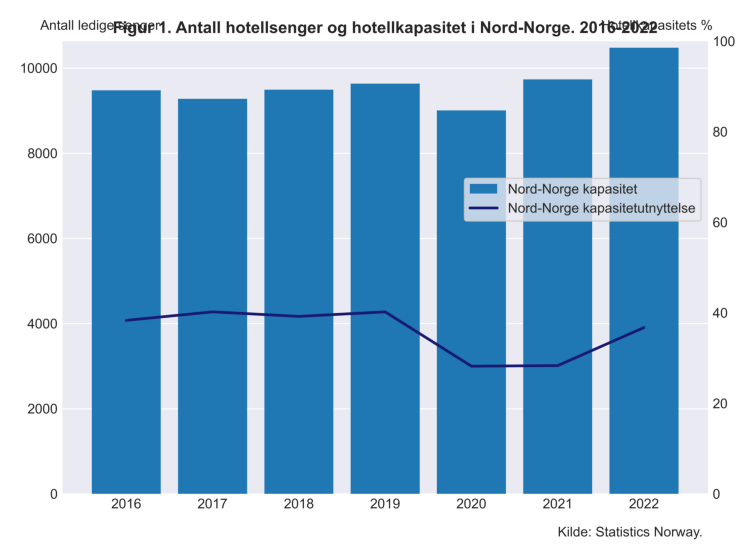

In [93]:
plt.figure(figsize=(10, 7))
plt.axis('off')
plt.imshow(figur1);

Turister sto for 722000 hotellovernattinger i Nord-Norge i 2016 og hadde en topp på over 884000 overnattinger i 2019. På grunn av pandemien og covid-restriksjoner overnattet det kun 253000 turister i 2021. Etter pandemien har tallene tatt seg opp igjen og i 2022 sto turister for 40 prosent av overnattingene i Nord-Norge. 


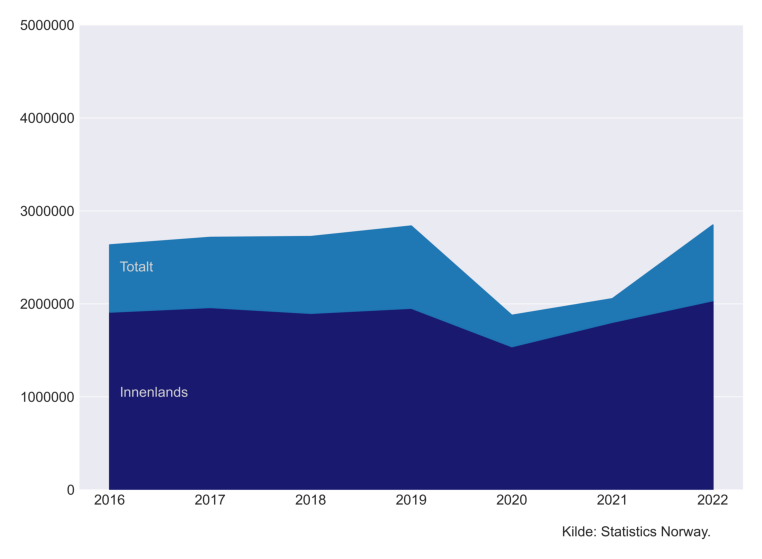

In [94]:
plt.figure(figsize=(10, 7))
plt.axis('off')
plt.imshow(figur2);

Turisme sysselsetter mange mennesker i Nord-Norge (se figur 3). I 2013 var det 6900 personer som var sysselsatt innenfor turisme i Troms fylke, og i 2019 har det økt til 9000 personer. Dette er en økning på 2100 personer fra 2013. I 2019 var det totalt 21 900 personer som var sysselsatt innenfor turisme i Nord-Norge.


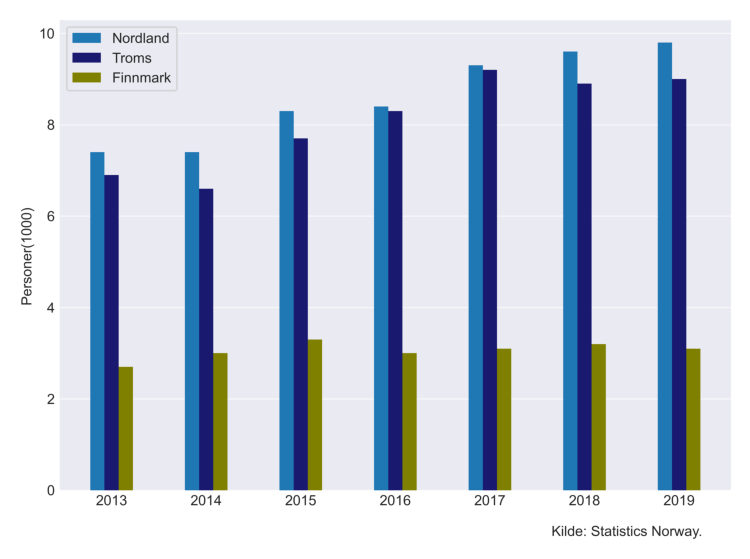

In [95]:
plt.figure(figsize=(10, 7))
plt.axis('off')
plt.imshow(figur3);

Ser man på hotelløkonomien i Nord-Norge så har den hatt en liten økning de siste årene. Den gjennomsnittlige hotellromsprisen var 858 kroner i 2016 og i 2022 var prisen økt til 1054 kroner. Over denne perioden har det blitt en økning på 22.8 prosent i hotellromsprisen.


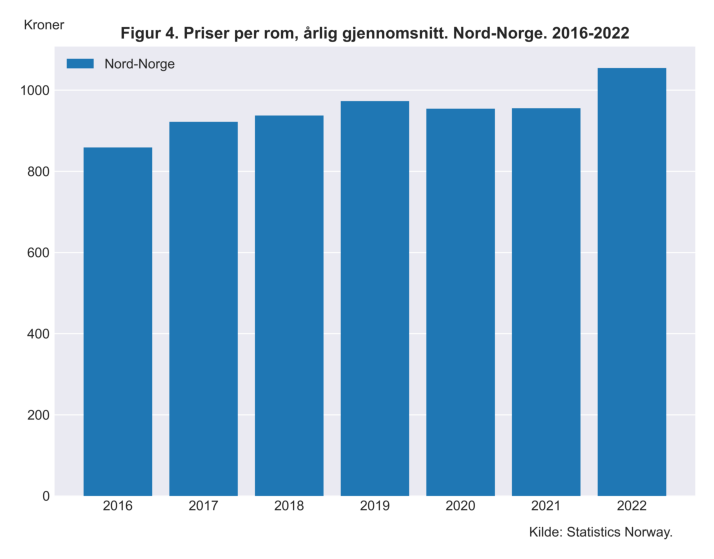

In [96]:
plt.figure(figsize=(10, 7))
plt.axis('off')
plt.imshow(figur4);

I figur 5 kan man se hvilke tider på året turister ankommer Nord-Norge. Vi kan se at det er sommermånedene som er mest populære, i 2016 ankom det ca. 126 000 turister i juli måned mens i 2022 har det vært en liten nedgang til 111 000 ankomne turister i samme måned.


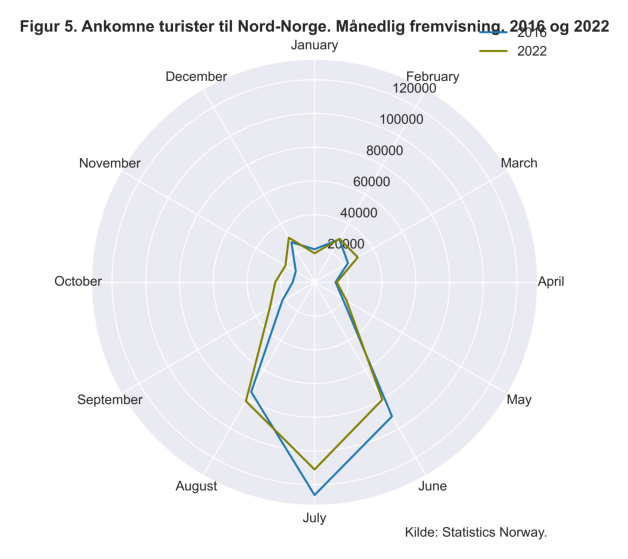

In [97]:
plt.figure(figsize=(10, 7))
plt.axis('off')
plt.imshow(figur5);

# **3. Samfunnsøkonomiske effekter av en turistskatt**



# **4. Konklusjon**

Besøksbidrag i Nord-Norge

# **Referanser**

fiskeridepartementet, N.- og (ingen dato) Vurderer destinasjoner for besøksbidrag, Regjeringen.no. Tilgjengelig på: [Link](https://www.regjeringen.no/no/aktuelt/vurderer-destinasjoner-for-besoksbidrag/id2959885/?expand=factbox2959954) (Accessed: March 20, 2023).

Dvorak, Z., 2019. Bærekraftig turisme i Arktis? En studie av utviklingen på Svalbard (Master's thesis, Nord universitet). Tilgjengelig på: [Link](https://nordopen.nord.no/nord-xmlui/bitstream/handle/11250/2648239/Dvorak.pdf?sequence=1) (Accessed: March 20, 2023).

[Figur 1](https://www.ssb.no/statbank/table/13153/) fra SSB tabell 13153

[Figur 2](https://www.ssb.no/statbank/table/13156/) fra SSB tabell 13156

[Figur 3](https://www.ssb.no/statbank/table/09266/) fra SSB tabell 09266

[Figur 4](https://www.ssb.no/statbank/table/13156/) fra SSB tabell 13156

[Figur 5](https://www.ssb.no/statbank/table/13154/) fra SSB tabell 13154


In [98]:
first_year

,value
2016-01-01,19550
2016-02-01,29390
2016-03-01,22859
2016-04-01,12441
2016-05-01,19148
2016-06-01,91780
2016-07-01,126115
2016-08-01,75064
2016-09-01,22166
2016-10-01,12979
